In [ ]:
# importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# loading the dataset into pandas dataframe
!wget https://personal.utdallas.edu/~pxn210006/housing.csv
housing_df = pd.read_csv('/content/housing.csv')

--2022-09-27 02:11:56--  https://personal.utdallas.edu/~pxn210006/housing.csv
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.46.112
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.46.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  3.76MB/s    in 0.4s    

2022-09-27 02:11:57 (3.76 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16077,-122.48,37.74,52.0,2841.0,517.0,1372.0,517.0,3.9236,335000.0,NEAR OCEAN
15118,-116.95,32.84,31.0,1307.0,NaN,752.0,231.0,3.4286,129400.0,<1H OCEAN
4605,-118.33,34.07,52.0,2248.0,255.0,813.0,265.0,15.0001,500001.0,<1H OCEAN
7443,-118.19,33.96,40.0,979.0,296.0,934.0,292.0,2.6354,151800.0,<1H OCEAN
13042,-121.13,38.55,8.0,530.0,109.0,398.0,96.0,4.2031,212500.0,INLAND


In [ ]:
# number of rows and columns of dataframe
housing_df.shape

(20640, 10)

In [ ]:
# finding total missing values for all columns
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# drop missing values
housing_df = housing_df.dropna()

# shape after dropping rows
housing_df.shape

(20433, 10)

In [ ]:
# checking again if there are any missing values
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# Exporing the categorical data
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# convert categorical data into numerical data
housing_df = pd.get_dummies(housing_df, columns= ['ocean_proximity'])

# showing data after converting categorical data
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
# original dataset had 10 columns, now we have 14 columns
housing_df.shape

(20433, 14)

In [ ]:
# showing correlation between data
housing_df_corr = housing_df.corr()
housing_df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


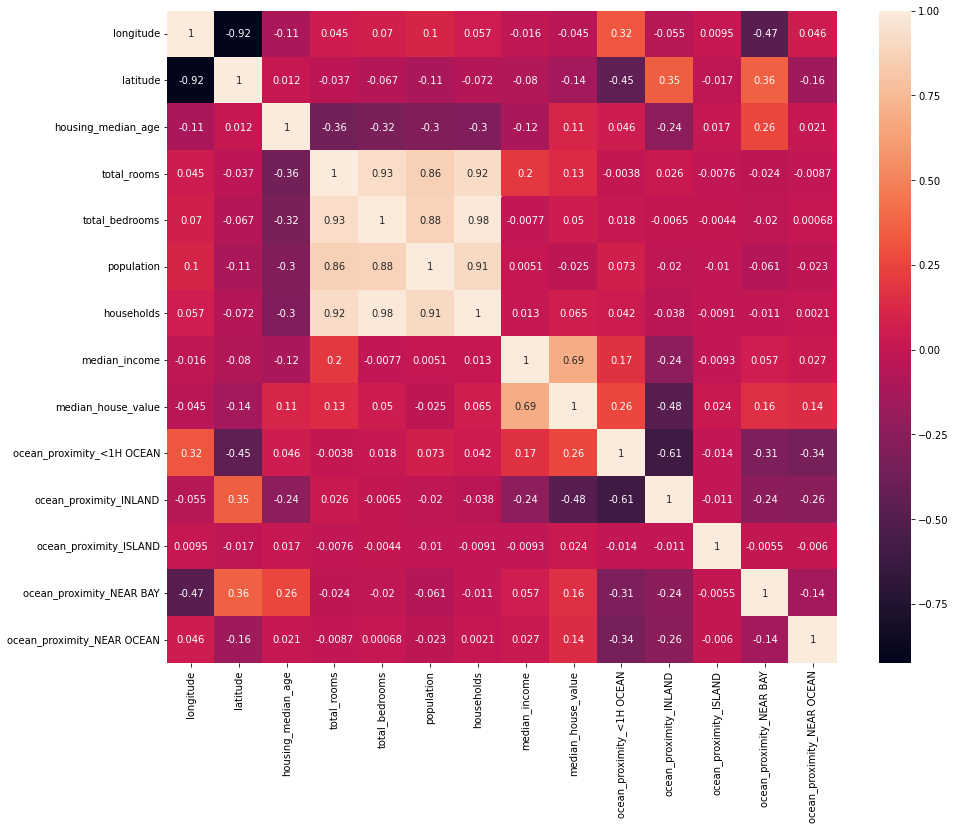

In [ ]:
# housing dataset correlation in heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
sns.heatmap(housing_df_corr, annot=True)

In [ ]:
# checking which features will give us best result
corr_df = housing_df_corr[['median_house_value']].abs().sort_values(by=['median_house_value'], ascending=False)
row_names = corr_df.iloc[1:, :].index

x_df = pd.DataFrame() # features, intially empty
y_df = housing_df['median_house_value'] #target

linear_regressor = LinearRegression() #model

for name in list(row_names):
  x_df = pd.concat([x_df, housing_df[[name]]], axis = 1) #combining dataframes

  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 45) #split

  lr = linear_regressor.fit(x_df, y_df) #fit model

  print("Training Score: ", lr.score(x_df, y_df)) #r2 score

Training Score:  0.47383326039767115
Training Score:  0.5832249132079954
Training Score:  0.5874871608339192
Training Score:  0.5875460923148483
Training Score:  0.5875488804262803
Training Score:  0.588131692218228
Training Score:  0.5886876717847412
Training Score:  0.6006561543041549
Training Score:  0.6058204329458223
Training Score:  0.6139686504851121
Training Score:  0.624911489652547
Training Score:  0.6464638320299037
Training Score:  0.6464638320299037


In [ ]:
# extracting data
# we are selecting all features as this would give us the best model as seen above
x = housing_df.drop('median_house_value', axis=1) # features
y = housing_df['median_house_value'] #target

In [ ]:
# splitting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [ ]:
# defining and fitting the linear model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
# r2 score for training data
print("Training Score: ", lr.score(x_train, y_train))

Training Score:  0.6480944739155927


In [ ]:
# r2 score for test data
y_pred = lr.predict(x_test)
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.6368167545989971


In [ ]:
lr.intercept_

-2318895.930108135

In [ ]:
lr.coef_

array([-2.75922701e+04, -2.60858768e+04,  1.07513510e+03, -6.11705111e+00,
        9.96010820e+01, -4.36827919e+01,  6.53233737e+01,  3.94080582e+04,
       -2.23703603e+04, -6.10341933e+04,  1.28986357e+05, -2.77937548e+04,
       -1.77880482e+04])

In [ ]:
# we will standardize features except the ocean_proximity column which has categorical data
features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
x_train_features = x_train[features]
scaler = StandardScaler()
x_train[features] = scaler.fit_transform(x_train_features)

In [ ]:
# defining and fitting the sgd model
sgdr = SGDRegressor(max_iter=100000, tol=1e-3).fit(x_train, y_train)

In [ ]:
# r2 score for training data
print("Training Score: ", sgdr.score(x_train, y_train))

Training Score:  0.6464869388413657


In [ ]:
# standardize also for test data
test_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
x_test_features = x_test[features]
x_test[features] = scaler.fit_transform(x_test_features)

In [ ]:
# r2 score for test data
y_pred = sgdr.predict(x_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Testing Score:  0.6413397106728254


In [ ]:
sgdr.coef_

array([-55222.75327872, -56052.65862443,  12861.16879385, -13517.24314212,
        40476.81074543, -48707.16746245,  23879.74401612,  75027.47050271,
        47590.27822154,   9406.25958045,  12529.44413637,  43045.77847847,
        53265.90797383])

In [ ]:
sgdr.intercept_

array([169326.06938477])